In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short94_c2_000.csv.gz',index_col=False)
dataset = pd.concat([dataset91, dataset92, dataset93, dataset94])
#print(dataset.ECM.unique())

In [2]:
#section 1: 
lum1 = 711.1 #luminosity for this section
condition1 = np.abs(dataset91.ECM-88.5) < 0.1 #ECM for this section is near 88.5
dataset91.loc[condition1, "LUM"] = lum1 #set the luminosity under row "LUM"


#section 2: 
lum2 = 632.7
condition2 = np.abs(dataset91.ECM-89.5) < 0.1
dataset91.loc[condition2, "LUM"] = lum2


#section 3: 
lum3 = 622.6
condition3 = np.abs(dataset91.ECM-90.2) < 0.1
dataset91.loc[condition3 , "LUM"] = lum3


#section 4: 
lum4 = 2482.5
condition4 = np.abs(dataset91.ECM-91.2) < 0.1
dataset91.loc[condition4, "LUM"] = lum4


#section 5: 
lum5 = 666.1
condition5 = np.abs(dataset91.ECM-92) < 0.1
dataset91.loc[condition5, "LUM"] = lum5


#section 6: 
lum6 = 634.6
condition6 = np.abs(dataset91.ECM-93) < 0.1
dataset91.loc[condition6, "LUM"] = lum6


#section 7: 
lum7 = 681.2
condition7 = np.abs(dataset91.ECM-93.7) < 0.1
dataset91.loc[condition7, "LUM"] = lum7

To determine the spin of the particle, we can look at the cross-sections plotted as a function of $cos(\theta)$ at a specific ECM. If the graph dips in the middle we have spin 1, but if its traight we have spin 0.For this plot we combine the $\theta$:s of both muons using the a stacked histogram. Its important to remember than now we have 2 datapoints for every event so we need to half the weight. For this plot we can only use data from 1991 since the luminosities aren't available for other years. We choose a ECM approximate to the weight of $Z_0$ and also plot 2 GeV down and up from that for comparison. 

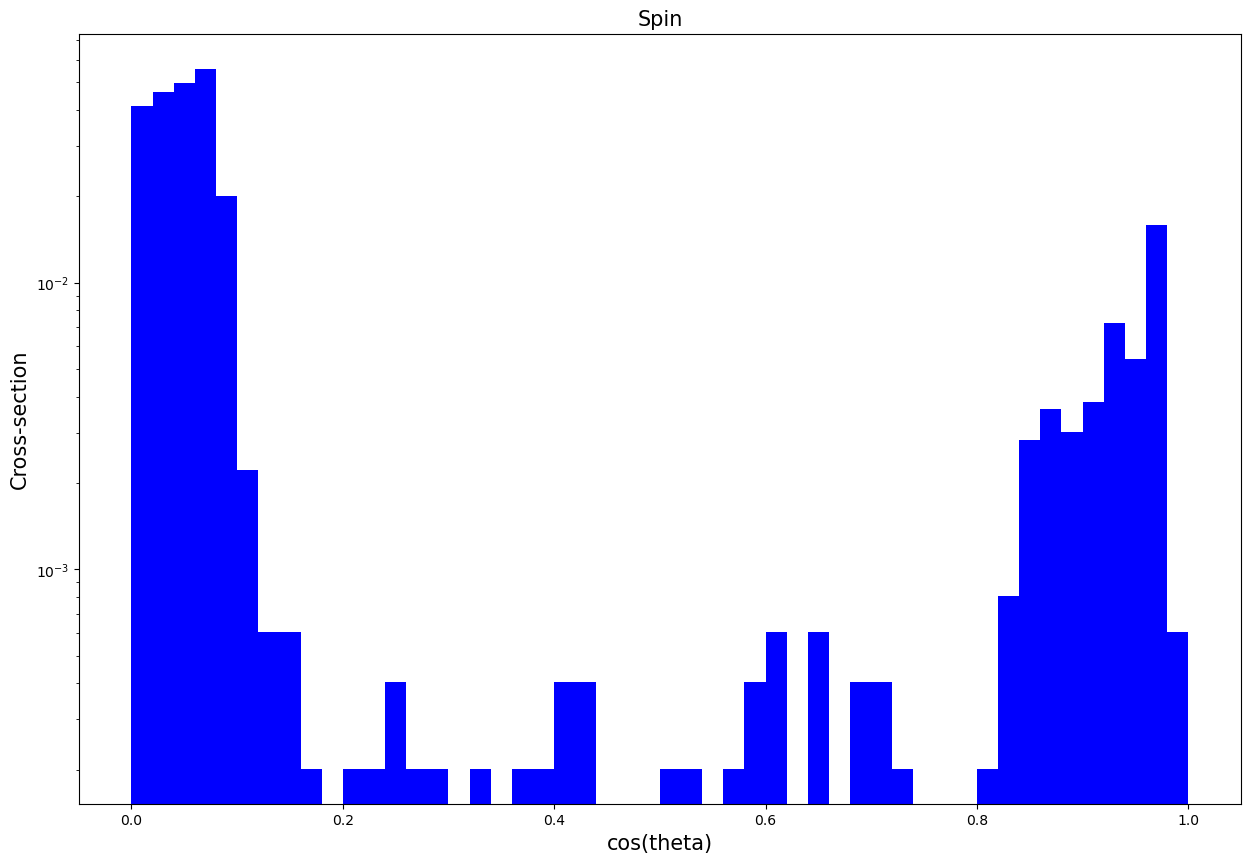

In [3]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-91.2) < 0.1]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [1/limited_ECM.LUM/2, 1/limited_ECM.LUM/2] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin', fontsize=15) 

plt.show()

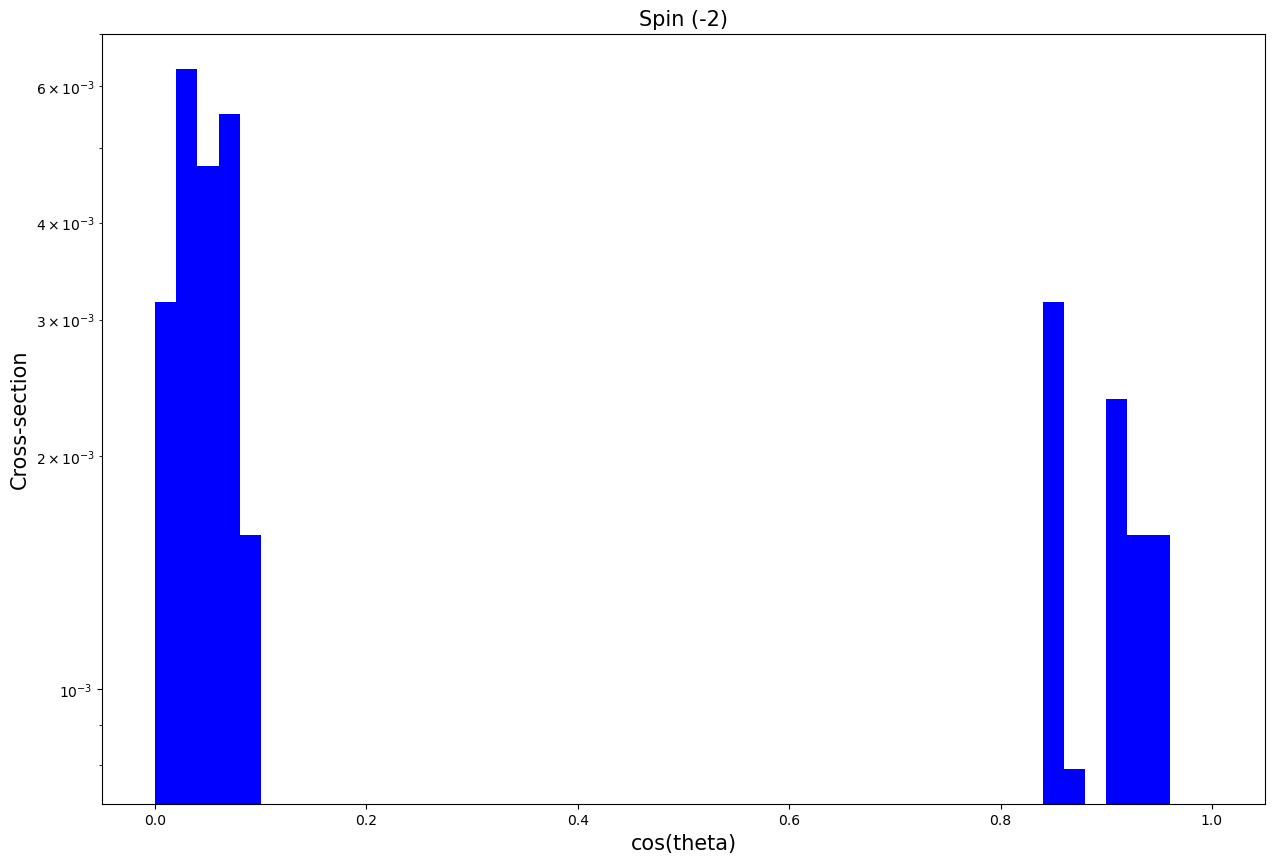

In [4]:
fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-89.5) < 0.1]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [1/limited_ECM.LUM/2, 1/limited_ECM.LUM/2] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (-2)', fontsize=15) 

plt.show()

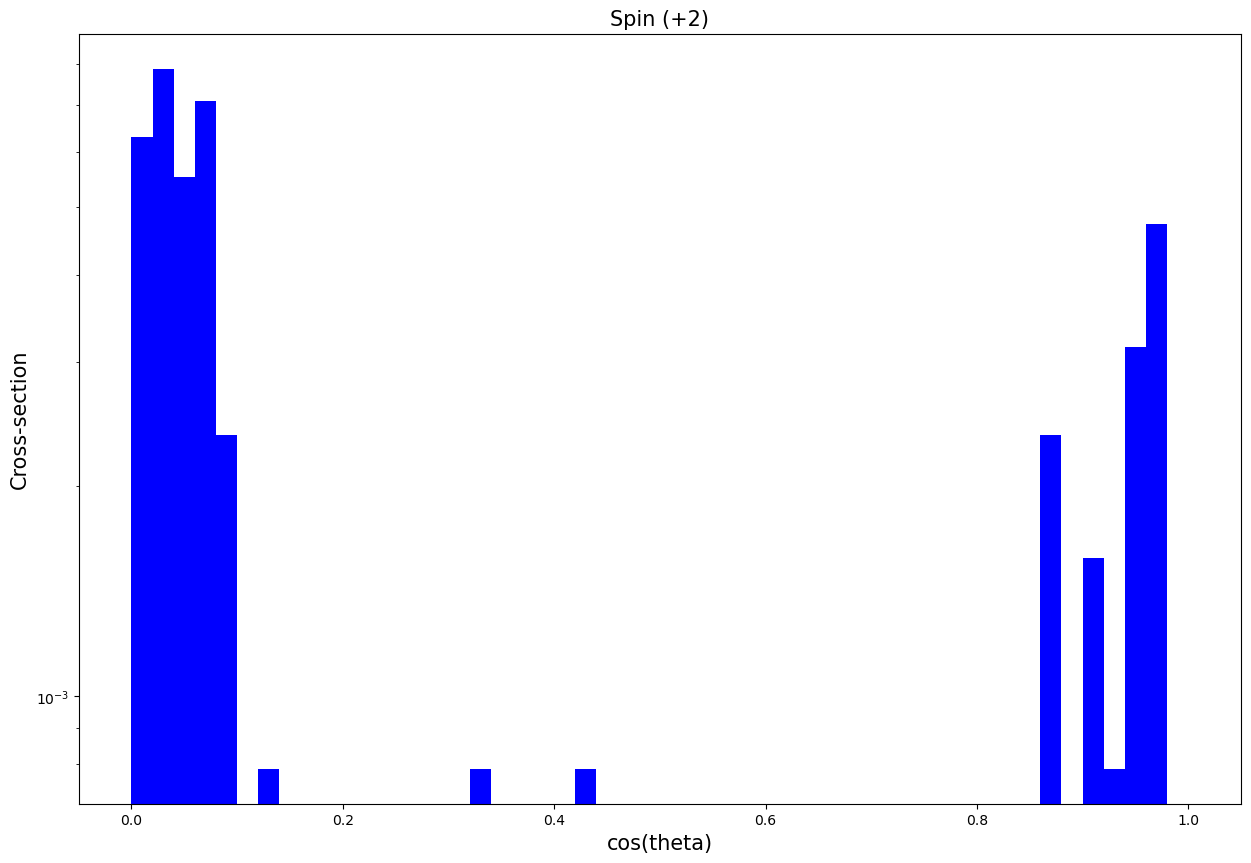

In [5]:
fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-93) < 0.1]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [1/limited_ECM.LUM/2, 1/limited_ECM.LUM/2] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (+2)', fontsize=15) 

plt.show()

Well clearly it isn't straight, so the spin is more than likely to be 1. It seems that there isn't enough data to make a proper graph. If we assume that luminosity remains constant over the years for the same ECM value, since we only look at specific ECM values, we can assume them to be constant and that way use the entire data:

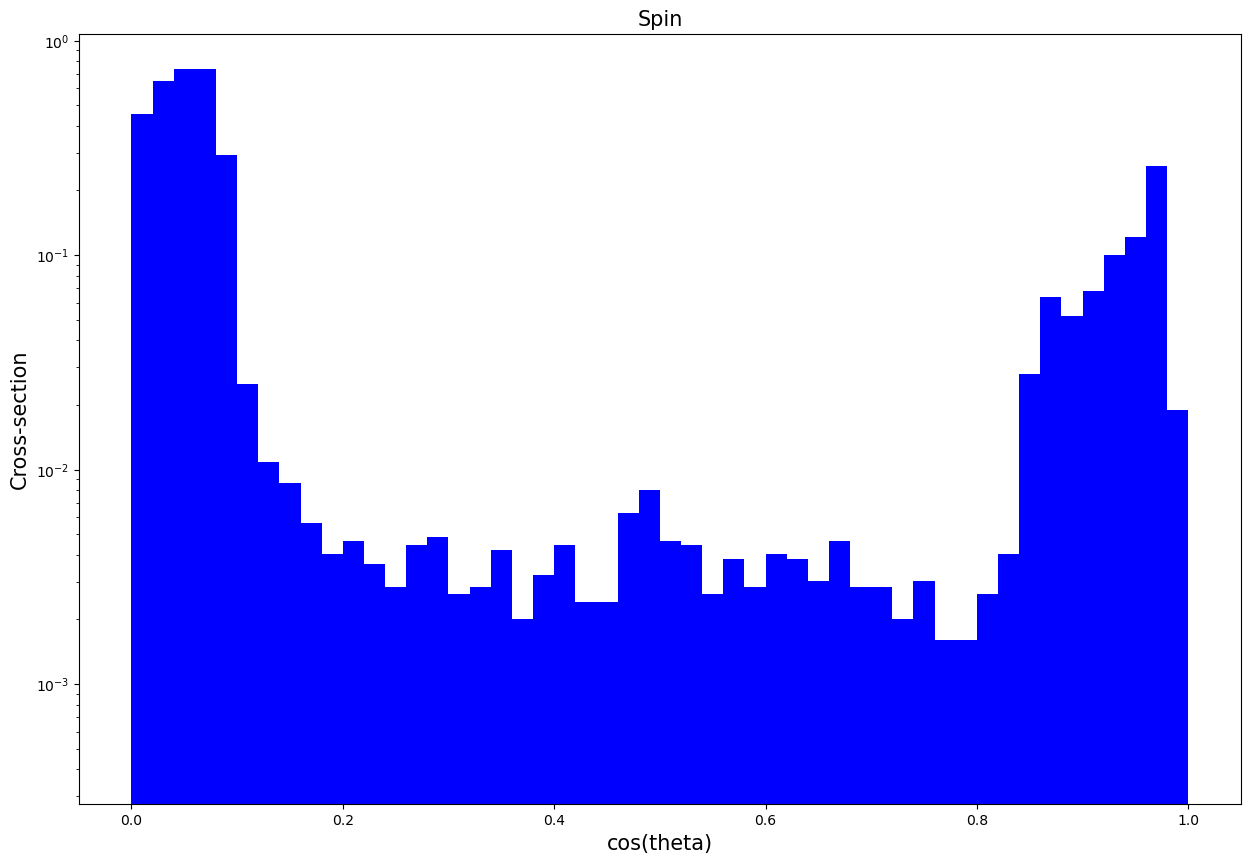

In [6]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-91.2) < 0.2]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [[1/2482.5/2]*len(limited_ECM), [1/2482.5/2]*len(limited_ECM)] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin', fontsize=15) 

plt.show()

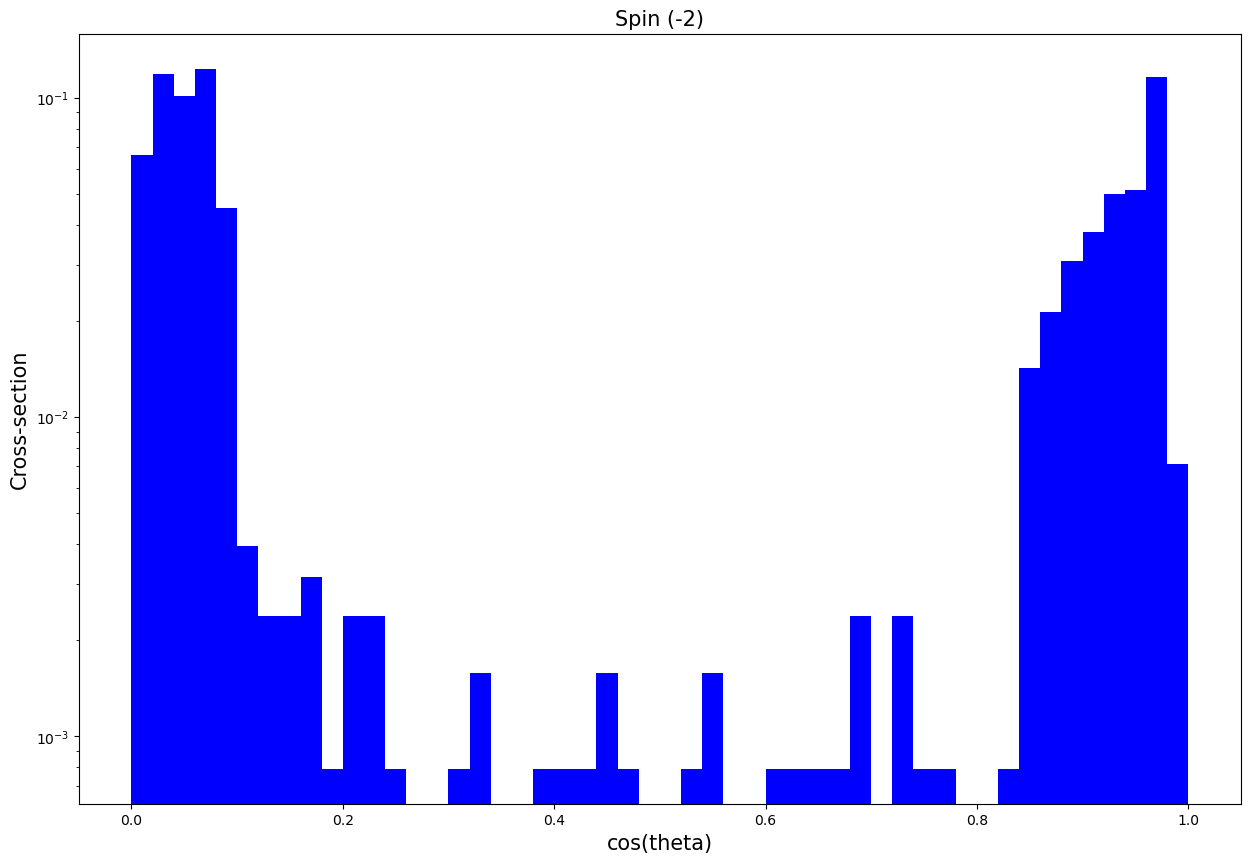

In [7]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-89.5) < 0.2]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [[1/632.7/2]*len(limited_ECM), [1/632.7/2]*len(limited_ECM)] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (-2)', fontsize=15) 

plt.show()

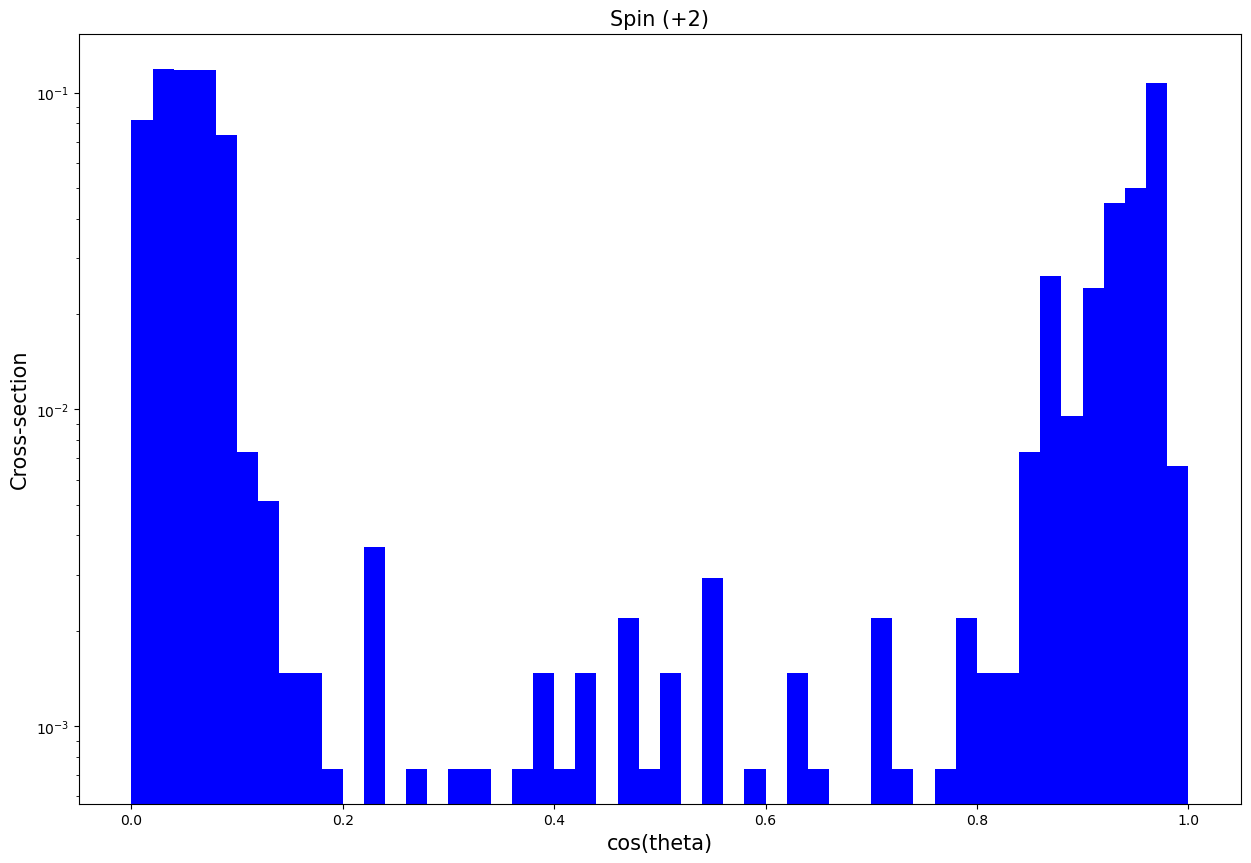

In [8]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-93) < 0.2]
plt.hist([np.cos(limited_ECM.THETA1),np.cos(limited_ECM.THETA2)], color = ["blue", "blue"], bins=bins, range=(lowerlimit,upperlimit), weights = [[1/681.2/2]*len(limited_ECM), [1/681.2/2]*len(limited_ECM)] , stacked = True)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (+2)', fontsize=15)
plt.show()

In [ ]:
The graph at energy values near $Z_0$:s mass is quite good and shows clearly the dip in the middle. 